# HW03
In this assignment, you will learn how to visualize data using seaborn and matplotlib.<br> Futhermore, you will be able to learn how to visualize high-dimensinal data using t-SNE.<br>


Please write down your code between <br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# BEGIN_YOUR_CODE**<br>
&nbsp;&nbsp;&nbsp;&nbsp; and<br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# END_YOUR_CODE**.<br>
When submitting, rename the file to HW03_[student_id].ipynb (ex.HW03_20211234.ipynb) and submit it to PLMS.

In [3]:
# DO NOT import any external libraries other than these.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
%matplotlib inline

## 1. Seaborn

In problem 1, the visualization must be done using seaborn.<br>
(Do not use matplotlib or any kind of visualization library to draw the plot.)

Load the dataset `premier.csv`.

Here's what the column names indicate:
- Pos: position of the player
- MP: matches played
- Min: minutes played
- Gls: goals scored or allowed
- Ast: assists
- PK: penaly kicks made
- CrdY: Yellow Cards
- CrdR: Red Cards

In [4]:
# BEGIN_YOUR_CODE
df = pd.read_csv("premier.csv", encoding='latin1')

# END_YOUR_CODE
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'premier.csv'

### a. Preprocessing
Before we start the visualization, let's go through a series of preprocessing steps.<br>
First, replace nan values in `Age` with mean of a column.

In [5]:
# BEGIN_YOUR_CODE
df['Age'].fillna((df['Age'].mean()), inplace=True)


# END_YOUR_CODE

NameError: name 'df' is not defined

Then, delete the rows with nan values.

In [ ]:
# BEGIN_YOUR_CODE
df =df.dropna()

# END_YOUR_CODE

Next, let's keep only the first position in the `Pos` column.<br>
For instance, if the original value is `FW, MF`, you should keep `FW`.<br>
Hint: try using pd.apply

In [ ]:
# BEGIN_YOUR_CODE
def first(x):
    return x.split(',', 1)[0]
df["Pos"] = df["Pos"].apply(first)

# END_YOUR_CODE
df.head()

,Player,Team,Nation,Pos,Age,MP,Min,Gls,Ast,PK,CrdY,CrdR
0,Bukayo Saka,Arsenal,eng ENG,FW,19.0,38,2978.0,11.0,7.0,2.0,6.0,0.0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,3063.0,5.0,0.0,0.0,8.0,1.0
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,3060.0,0.0,0.0,0.0,1.0,0.0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,2880.0,0.0,0.0,0.0,3.0,0.0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,2785.0,7.0,4.0,0.0,4.0,0.0


Lastly, create a new column named `Gls_Y` with a value of 0 (if the player has not scored or allowd a goal) or 1 (otherwise).

In [ ]:
# BEGIN_YOUR_CODE
def goal(x):
    return 0 if x==0 else 1
df["Gls_Y"]= df["Gls"].apply(goal)
# END_YOUR_CODE
df.head()

,Player,Team,Nation,Pos,Age,MP,Min,Gls,Ast,PK,CrdY,CrdR,Gls_Y
0,Bukayo Saka,Arsenal,eng ENG,FW,19.0,38,2978.0,11.0,7.0,2.0,6.0,0.0,1
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,3063.0,5.0,0.0,0.0,8.0,1.0,1
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,3060.0,0.0,0.0,0.0,1.0,0.0,0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,2880.0,0.0,0.0,0.0,3.0,0.0,0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,2785.0,7.0,4.0,0.0,4.0,0.0,1


Save the dataframe into `premier_final.csv`.<br>
Do not write the index as a column.

In [ ]:
# BEGIN_YOUR_CODE
df.to_csv('premier_final.csv', index=False)
# END_YOUR_CODE

### b. Visualization
For now, we will visualize the data to get a more comprehensive understanding.<br>
First, we would like to obtain the age distribution of the players.<br>
Create a set of subplots with the histogram of age on the left and the density plot of age on the right.

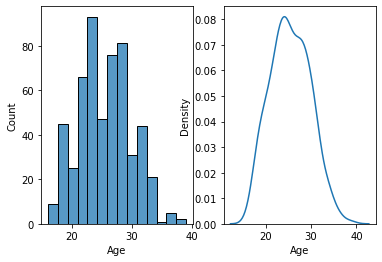

In [ ]:
# BEGIN_YOUR_CODE
df = pd.read_csv('premier_final.csv', encoding='latin1')
fig, ax =plt.subplots(1,2)
sns.histplot(data=df, x="Age", ax=ax[0])
sns.kdeplot(df['Age'],ax=ax[1])
plt.show()
# END_YOUR_CODE

Now, we want to compare the age distribution of each team.<br>
Draw a age boxplot for each team.

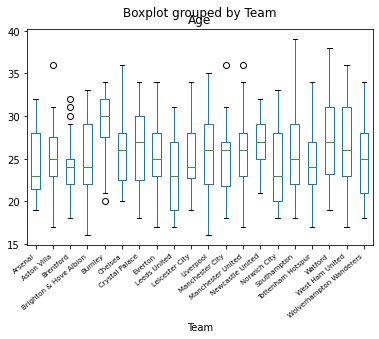

In [ ]:
# BEGIN_YOUR_CODE
ax = df.boxplot(by ='Team', column =['Age'], grid = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

plt.show()

# END_YOUR_CODE

Based on the results, which team has the youngest player?<br>
Answer: Brighton & Hove Albion, Liverpool

Then, let's check the age of each position.<br>
Draw a barplot where x is each position and y represents the mean of the age.

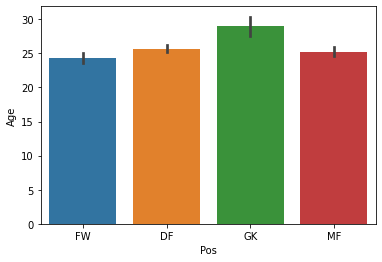

In [ ]:
# BEGIN_YOUR_CODE
sns.barplot(x = "Pos", y = "Age", data = df)
plt.show()


# END_YOUR_CODE

It seems like goal keepers are relatively old compared to other positions.<br>
Next, we would like to see if the player who scored (or allowed) played more **matches** than the player who did not.<br>
You want to check if it is true for **all teams**.<br>
Draw a stripplot to verify this.

/Users/syoon25/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gls_Y', ylabel='MP'>

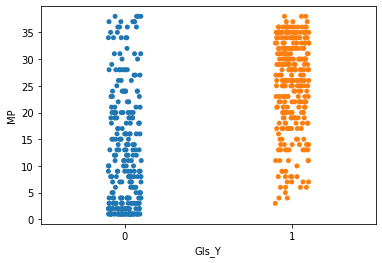

In [ ]:
# BEGIN_YOUR_CODE
sns.stripplot(df["Gls_Y"],df["MP"])

# END_YOUR_CODE

It seems that the player who scores the goal plays in more matches!<br>
Now, let's look at whether there is a correlation between age and **play time**. Draw a Jointplot for this.

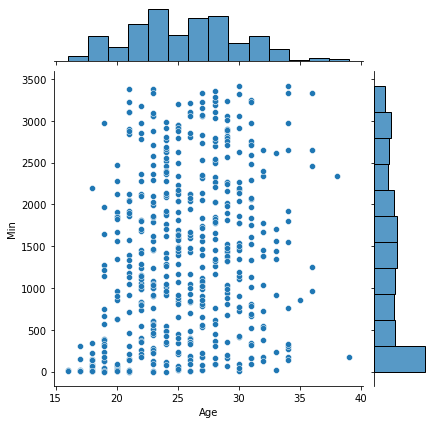

In [ ]:
# BEGIN_YOUR_CODE
sns.jointplot(x=df["Age"], y=df["Min"])

# END_YOUR_CODE

Seems like there not much correlation between the age and playtime.<br>
Add `Gls_Y` as hue to the code above.

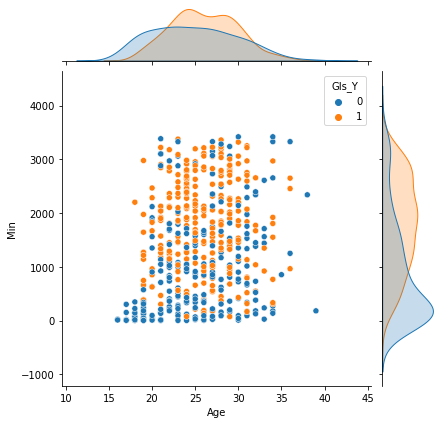

In [ ]:
# BEGIN_YOUR_CODE

sns.jointplot(x=df["Age"], y=df["Min"], hue=df["Gls_Y"])
# END_YOUR_CODE

We still can't find a clear correlations, but it does show a more detailed analysis.<br>
Lastly, let's check the difference in playtime for each position.<br>
Plot the kernel density estimation plot of playtime for each position.

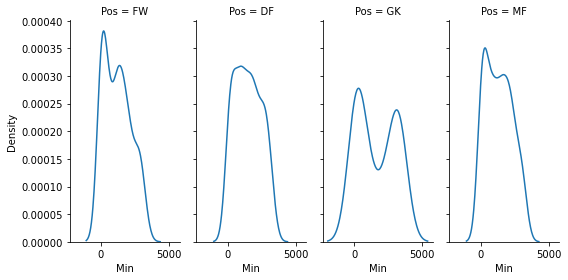

In [ ]:
# BEGIN_YOUR_CODE
g = sns.FacetGrid(df, col="Pos", height=4, aspect=.5)
g.map(sns.kdeplot, "Min")
# END_YOUR_CODE

You have finished all of the seaborn problems. Well done!

## 2. Matplotlib
In problem 2, the visualization must be done using matplotlib.<br>
(Do not use seaborn or any kind of visualization library to draw the plot.)

### a. Basic plot 1
Draw sine and cosine graphs of X on one figure.<br>
The sine graph should have a width of 1 and a solid red line.<br>
On the other hand, the cosine graph should have a width of 2 with a blue dashed line.

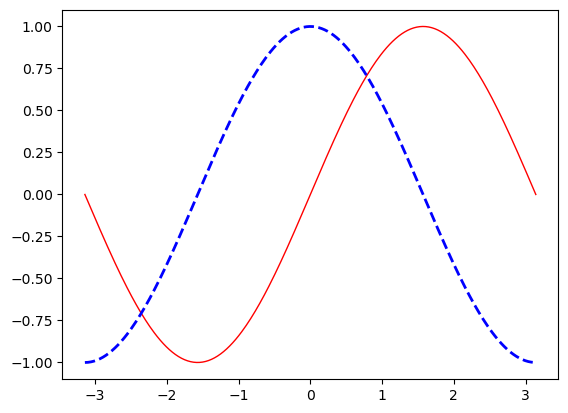

In [6]:
X = np.linspace(-np.pi, np.pi, 300)
# BEGIN_YOUR_CODE
cos_X=np.cos(X)
sin_X=np.sin(X)

plt.plot(X,sin_X,linewidth=1,linestyle='solid', color='red')
plt.plot(X,cos_X, linewidth=2,linestyle='dashed',color='blue')
# END_YOUR_CODE

### b. Basic plot 2
Next, we will draw two subplots with two rows and one column.<br>
Draw **line graph** of $y=x^2$ on the left.<br>
Set title as "Polynomial Functions".<br>
On the right, draw **scatter plot** of $y=-x^2$.<br>
Set title as "Polynomial Functions" and set the range of x to (-10, 10).


(-10.0, 10.0)

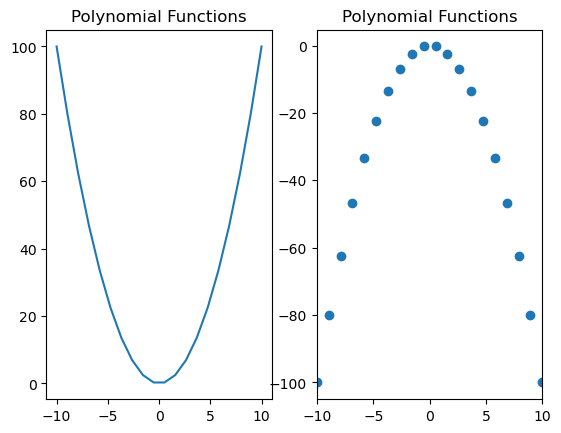

In [7]:
X = np.linspace(-10,10,20)
# BEGIN_YOUR_CODE
plt.subplot(1,2,1)
plt.plot(X, X*X)
plt.title("Polynomial Functions")
plt.subplot(1,2,2)
plt.scatter(X,-X*X)
plt.title("Polynomial Functions")
plt.xlim([-10,10])
# END_YOUR_CODE

### c. Quantile plot
Here, we will draw a quantile plot of a normal distribution.<br>
$a$ is a sample taken from a normal distribution.<br>
First, compute the $qth$ percentile(s) of the sample.<br>
Then, draw a quantile plot.

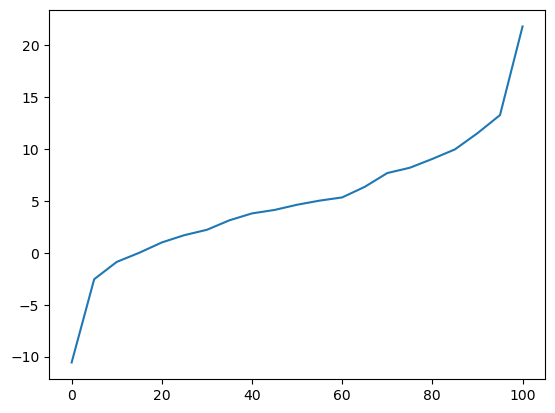

In [8]:
a = np.random.normal(5,5,250) # random.normal(mean, std, size of sample)

q = np.linspace(0,100,21)
# BEGIN_YOUR_CODE
plt.plot(q,np.percentile(a,q))
# END_YOUR_CODE

Then, let's check if the Rayleigh distribution follows a normal distribution.<br>
First, compute the $qth$ percentile(s) of the sample for each distribution.<br>
Then, draw a Q-Q plot.
Label the x and y axis as 'Branch A (normal)' and 'Branch B (rayleigh)', respectively.

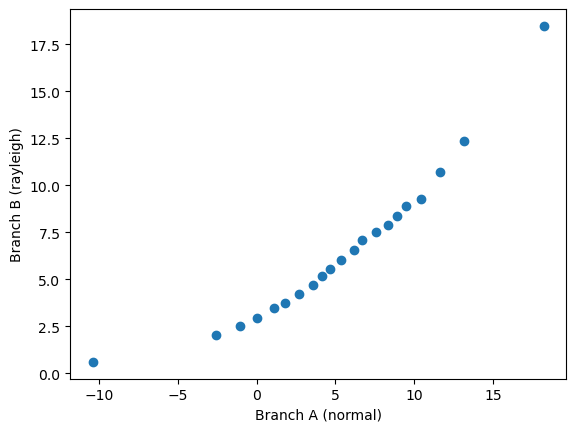

In [9]:
a = np.random.normal(5,5,250) # random.normal(mean, std, size of sample)
b = np.random.rayleigh(5,250)

q = np.linspace(0,100,21)

# BEGIN_YOUR_CODE
qp_a=np.percentile(a,q)
qp_b=np.percentile(b,q)
plt.plot(qp_a,qp_b,ls="",marker="o")
plt.xlabel('Branch A (normal)')
plt.ylabel('Branch B (rayleigh)')
# END_YOUR_CODE

# do not change the line below.
#x = np.linspace(np.min((quantile_a.min(),quantile_b.min())), np.max((quantile_a.max(),quantile_b.max())))
#plt.plot(x,x, color='k', ls='--')  # k is black


plt.show()

## 3. t-SNE

Run the cell below to load the wine dataset.

reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine 

In [16]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
wine_df, target = data['data'], data['target']
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Now, let's visualize data using t-SNE!<br>
Execute dimensionality reduction using t-SNE. The size of the reduced dimension is 2.<br>
Print a dataframe `tsne_df` with column names 'component_0' and 'component_1', each row representing the output of tsne.

In [19]:
# BEGIN_YOUR_CODE
tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(wine_df)
tsne_df = pd.DataFrame({'component_0':tsne_obj[:,0],'component_1':tsne_obj[:,1]})
# END_YOUR_CODE
tsne_df


KeyError: 'target'

Well done! Visualize the results by running the cell below.

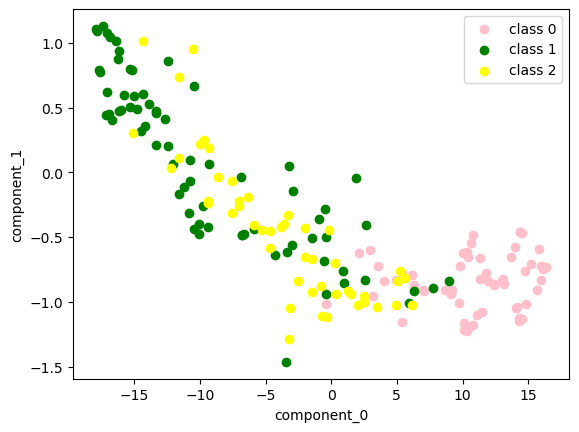

In [12]:
tsne_df['target'] = target

tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

plt.scatter(tsne_df_0['component_0'], tsne_df_0['component_1'], color = 'pink', label = 'class 0')
plt.scatter(tsne_df_1['component_0'], tsne_df_1['component_1'], color = 'green', label = 'class 1')
plt.scatter(tsne_df_2['component_0'], tsne_df_2['component_1'], color = 'yellow', label = 'class 2')


plt.xlabel('component_0')
plt.ylabel('component_1')
plt.legend()
plt.show()

Uh-oh. It seems like something is wrong. We might need to preprocess the data.

First, let's see if there's is a correlation between the variables.<br>
Plot a scatterplot with figsize (10,10) for each pairing of the variables using seaborn.<br>

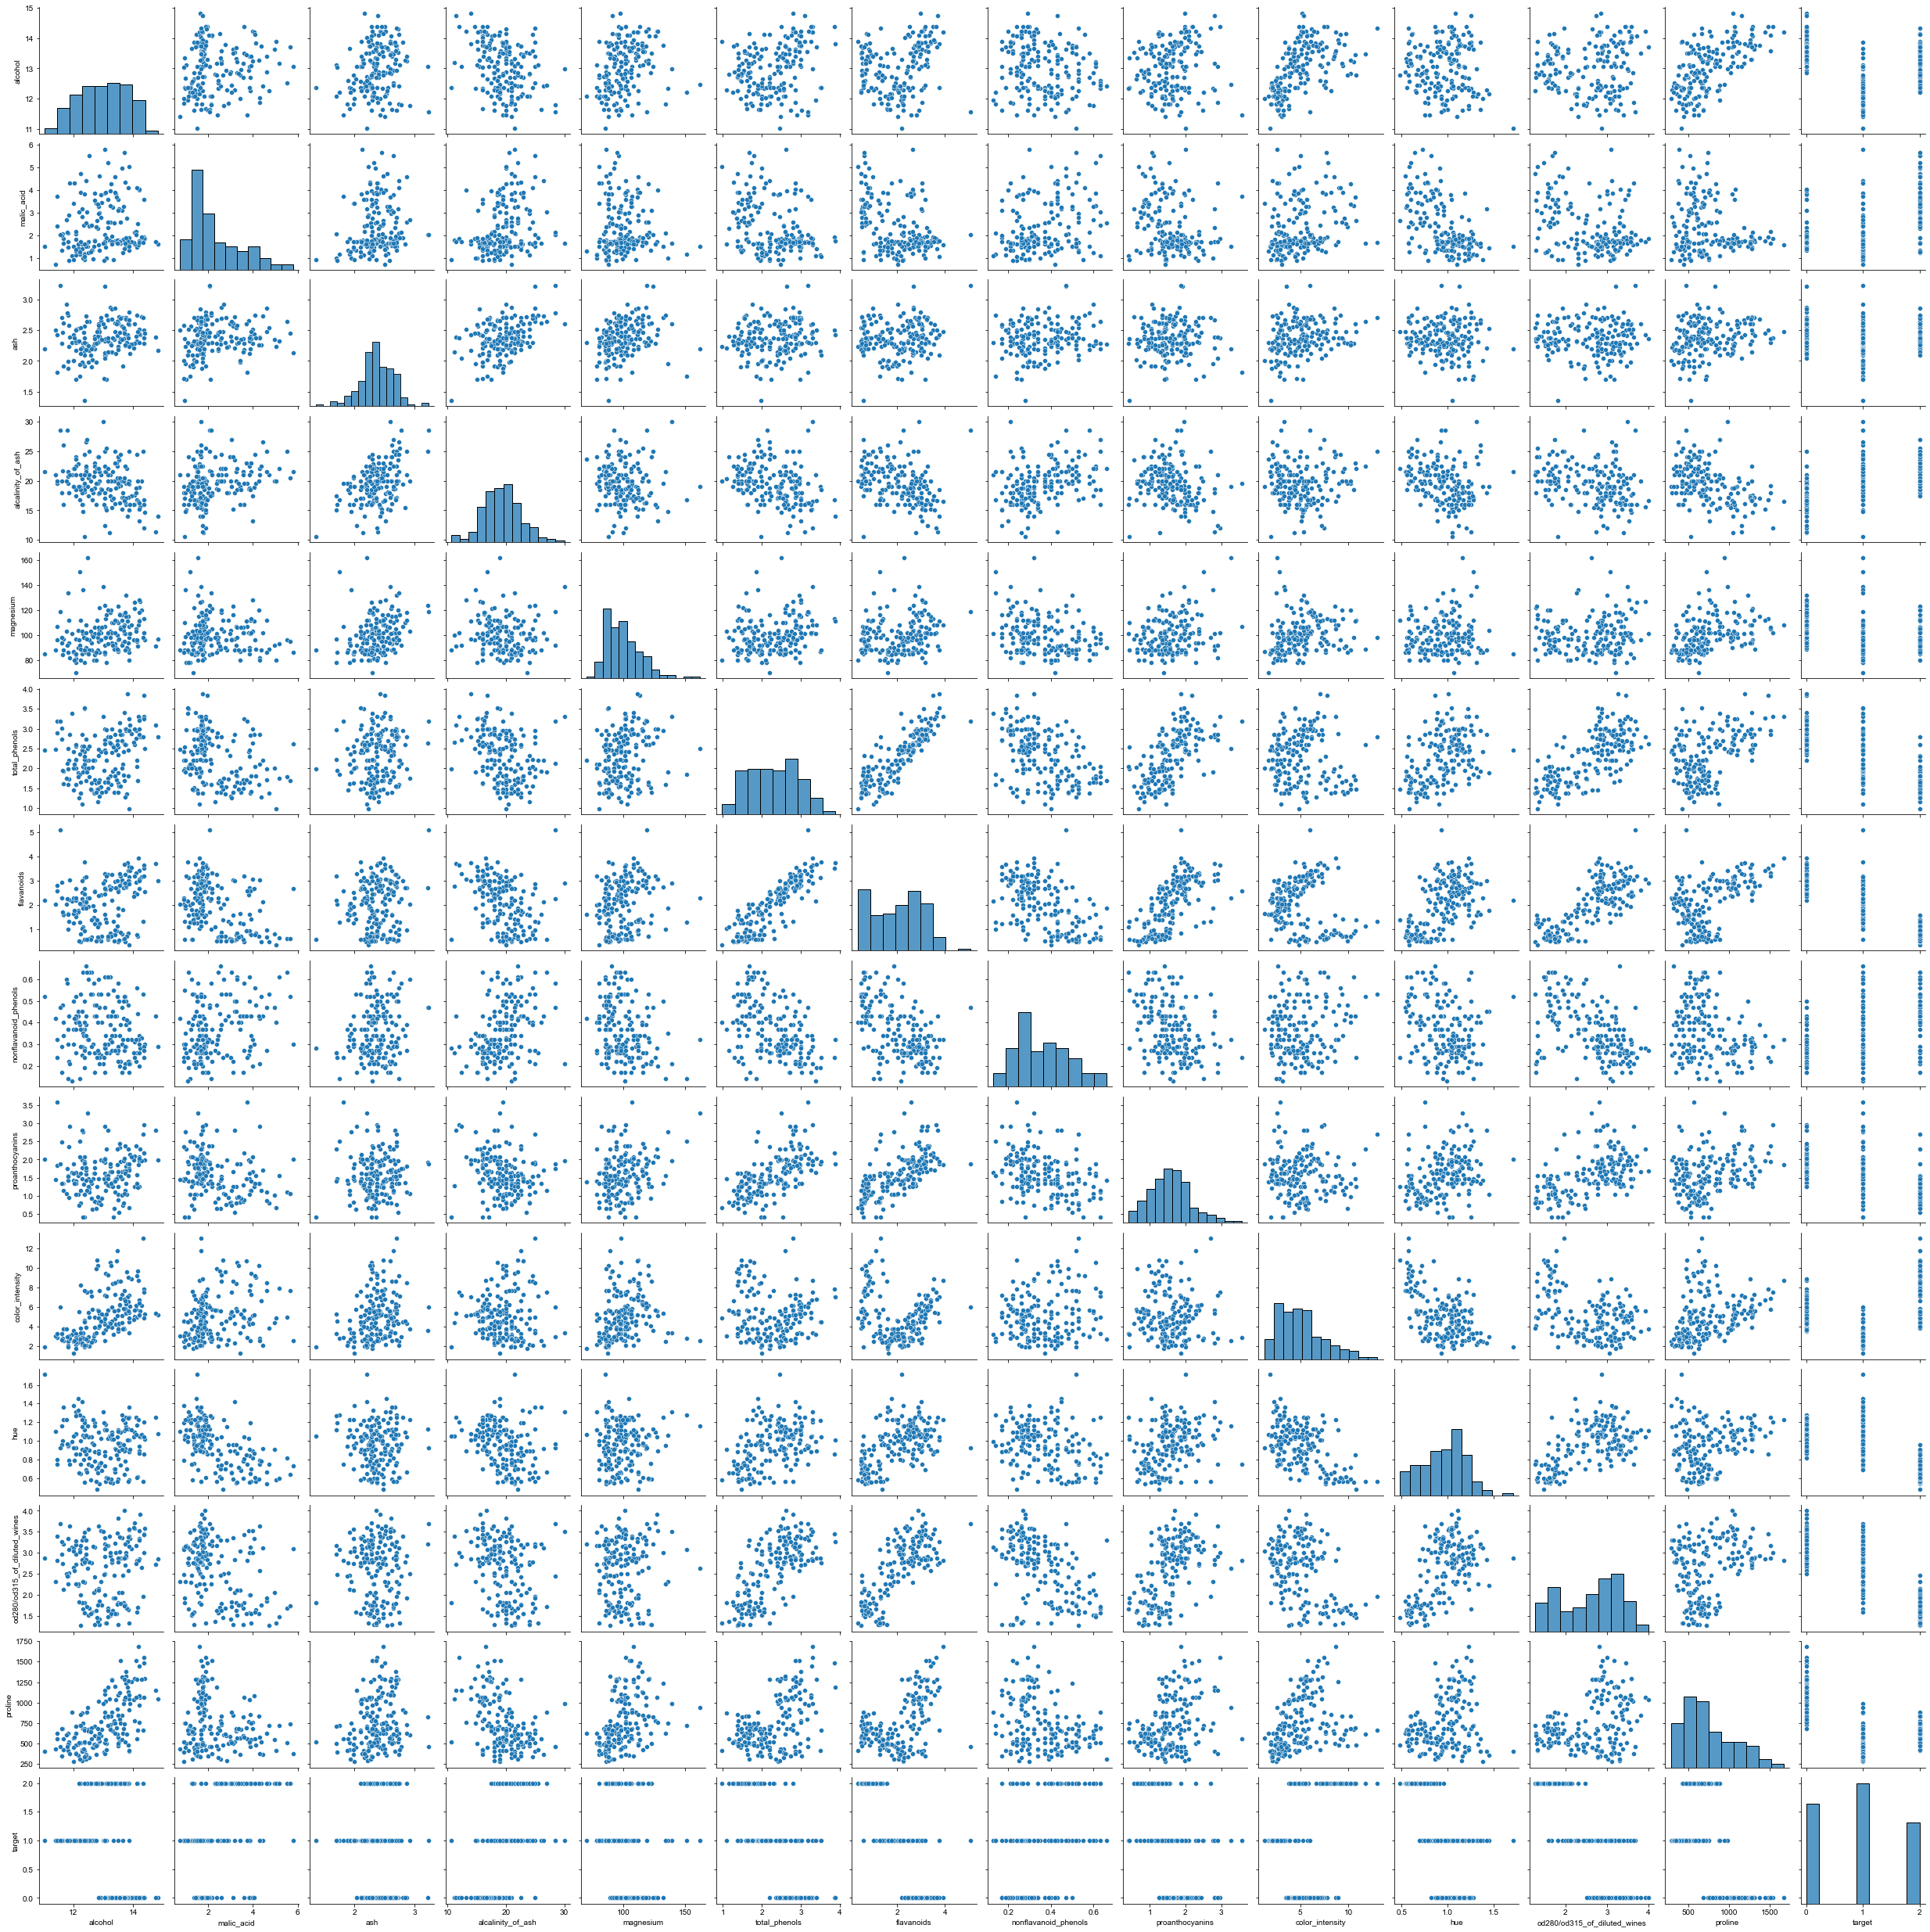

In [ ]:
# BEGIN_YOUR_CODE
dfile  = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])
sns.pairplot(dfile)
sns.set(rc={'figure.figsize':(10,10)})
# END_YOUR_CODE


There seems to be a correlation between several variables, but it is unclear which one is which.<br>
Plot a heatmap of correlations using seaborn.<br>

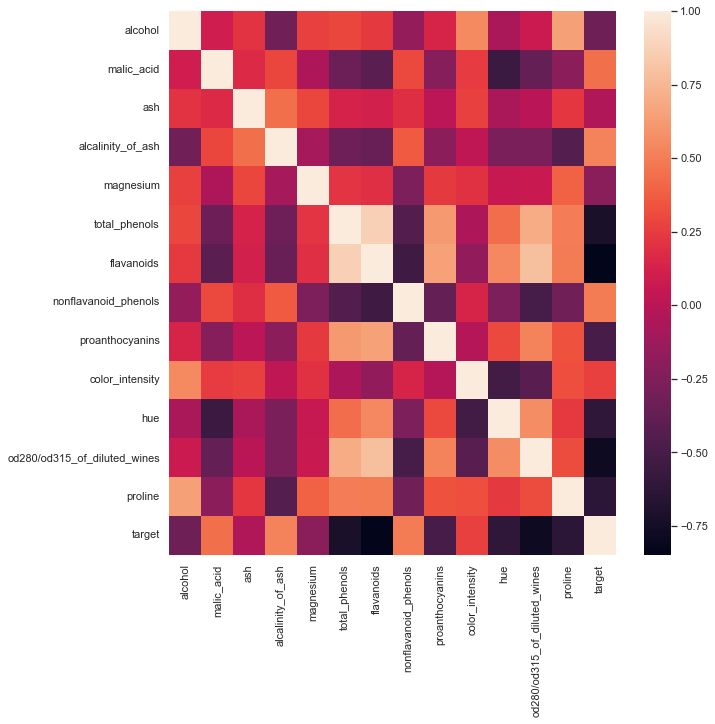

In [ ]:
# BEGIN_YOUR_CODE
ax = sns.heatmap(dfile.corr())
plt.show()
# END_YOUR_CODE

There seems to be a high correlation across multiple variables.<br>
Let's drop column names `malic_acid`, `alcalinity_of_ash`, and `nonflavanoid_phenols` which seems to be highly correlated with other variables.

In [ ]:
# BEGIN_YOUR_CODE
wine_df=wine_df.drop(['malic_acid','alcalinity_of_ash','nonflavanoid_phenols'],axis=1)
# END_YOUR_CODE
wine_df.head()

,alcohol,ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,2.43,127.0,2.80,3.06,2.29,5.64,1.04,3.92,1065.0
1,13.20,2.14,100.0,2.65,2.76,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.67,101.0,2.80,3.24,2.81,5.68,1.03,3.17,1185.0
3,14.37,2.50,113.0,3.85,3.49,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.87,118.0,2.80,2.69,1.82,4.32,1.04,2.93,735.0


The, let's min-max normalize the values.

In [ ]:
from sklearn import preprocessing

# BEGIN_YOUR_CODE
min_max_scaler = preprocessing.MinMaxScaler()

wine_df = min_max_scaler.fit_transform(wine_df)
print(wine_df)
# END_YOUR_CODE

[[0.84210526 0.57219251 0.61956522 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.4171123  0.32608696 ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.70053476 0.33695652 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.48128342 0.54347826 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.54010695 0.54347826 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.73796791 0.2826087  ... 0.10569106 0.12087912 0.20114123]]


Finally, let's run the t-SNE again with preprocessed data.<br>
Execute dimensionality reduction using t-SNE. The size of the reduced dimension is 2.<br>
Print a dataframe `tsne_df` with column names 'component_0' and 'component_1', each row representing the output of tsne.

In [ ]:
# BEGIN_YOUR_CODE
tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(wine_df)
tsne_df = pd.DataFrame({'component_0':tsne_obj[:,0],'component_1':tsne_obj[:,1]})
# END_YOUR_CODE
tsne_df.head()

/Users/syoon25/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/syoon25/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,component_0,component_1
0,6.481542,-9.128649
1,7.402329,-4.942666
2,9.655590,-9.023603
3,13.079906,-8.396542
4,5.481321,-3.479881


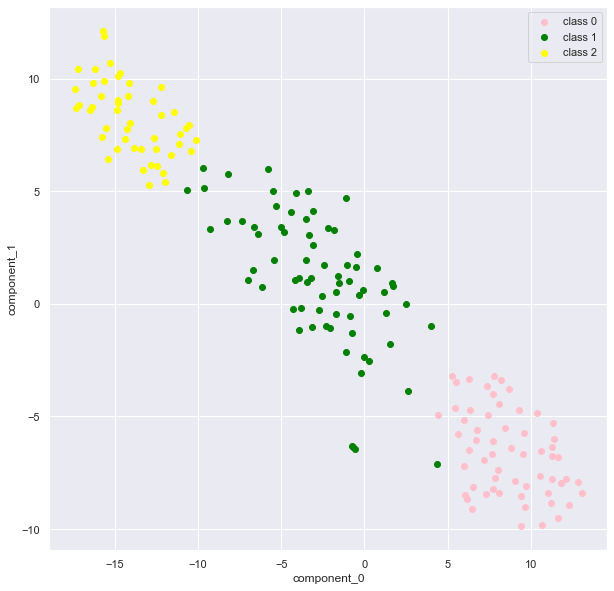

In [ ]:
# class target 정보 불러오기 
tsne_df['target'] = target

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component_0'], tsne_df_0['component_1'], color = 'pink', label = 'class 0')
plt.scatter(tsne_df_1['component_0'], tsne_df_1['component_1'], color = 'green', label = 'class 1')
plt.scatter(tsne_df_2['component_0'], tsne_df_2['component_1'], color = 'yellow', label = 'class 2')


plt.xlabel('component_0')
plt.ylabel('component_1')
plt.legend()
plt.show()

The results seem to be much better!<br>
Now we can see each class clearly separated.<br>
Remenber that preprocessing is super important.